In [81]:
%load_ext autoreload
%autoreload 2

In [1]:
import os, shutil

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import glob

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import soundscapy as ssp

from argparse import Namespace

In [87]:
from utils import *

In [8]:
from sklearn.decomposition import PCA, FastICA

In [95]:
HOME = os.getcwd()
DATA = os.path.join(HOME, '..', 'data')
calib_mode = 'hats'

df = load_data(DATA, calib_mode)

In [96]:
df

,stimulus_id,pl,ch,vi,un,ca,an,ev,mo,chk,t,pid,isopl,isoev
0,1,0.20,0.44,0.26,-0.88,-0.20,-0.38,0.70,-0.18,1,51.751,1,0.090833,0.485391
1,1,0.60,0.00,0.60,-1.00,-1.00,-1.00,1.00,-1.00,1,79.917,2,0.419239,0.794975
2,1,0.40,0.20,0.20,-0.20,0.00,-0.20,0.20,0.00,1,65.831,3,0.124264,0.141421
3,1,0.78,-0.82,0.78,-0.84,0.10,-0.58,0.26,-0.58,1,51.471,4,0.615563,0.292254
4,1,0.32,0.32,0.28,-0.20,-0.38,0.20,0.28,-0.74,1,51.135,5,0.071716,0.351299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,27,-0.50,0.20,0.66,0.38,-0.42,0.48,-0.48,0.32,1,80.202,22,-0.243970,-0.037523
671,27,0.50,-0.20,0.50,-0.20,0.20,-0.30,0.20,0.00,1,64.690,23,0.297487,0.097487
672,27,-0.14,0.44,0.22,0.40,-0.52,0.44,-0.18,0.46,1,75.361,24,-0.295858,-0.014680
673,27,0.00,0.20,0.40,-0.20,-0.20,-0.20,0.20,-0.20,1,100.610,25,0.070711,0.229289


In [94]:
dfx = df.groupby('stimulus_id').mean()    
pca = PCA(whiten=True)
pc = pca.fit_transform(dfx[PAQ])

for i in range(8):
    dfx[f'pc{i+1}proj'] = pc[:, i]

## Reliability Check

In [11]:
import pingouin as pg

In [71]:
def define_latex_command(name, value, value_format=None):
    
    if value_format is not None:
        if type(value_format) is str:
            value = value_format.format(value)
        else:
            value = value_format(value)
    
    nc = "\\newcommand{\\" + name + "}{" + value + "}"
    
    return nc

In [75]:
alph, ci = pg.cronbach_alpha(df, subject='pid', items='stimulus_id', scores=PAQ)

print(define_latex_command("cronbach", alph, "{:.3g}"))

print(define_latex_command("cronbachcilo", ci[0], "{:.3g}"))
print(define_latex_command("cronbachcihi", ci[1], "{:.3g}"))

\newcommand{\cronbach}{0.716}
\newcommand{\cronbachcilo}{0.534}
\newcommand{\cronbachcihi}{0.854}


In [13]:
ics = []

for p in PAQ:
    ic = pg.intraclass_corr(df, raters='pid', ratings=p, targets='stimulus_id')
    ic['PAQ'] = p

    ics.append(ic)
    
ics = pd.concat(ics).reset_index(drop=True).set_index(['Type', 'PAQ'])
ics

,,Description,ICC,F,df1,df2,pval,CI95%
Type,PAQ,,,,,,,
ICC1,pl,Single raters absolute,0.556402,32.357312,26,648,3.094135e-99,"[0.43, 0.71]"
ICC2,pl,Single random raters,0.557958,40.363343,26,624,1.842948e-115,"[0.43, 0.71]"
ICC3,pl,Single fixed raters,0.611580,40.363343,26,624,1.842948e-115,"[0.49, 0.75]"
ICC1k,pl,Average raters absolute,0.969095,32.357312,26,648,3.094135e-99,"[0.95, 0.98]"
ICC2k,pl,Average random raters,0.969283,40.363343,26,624,1.842948e-115,"[0.95, 0.98]"
ICC3k,pl,Average fixed raters,0.975225,40.363343,26,624,1.842948e-115,"[0.96, 0.99]"
ICC1,ch,Single raters absolute,0.557529,32.500877,26,648,1.406951e-99,"[0.43, 0.71]"
ICC2,ch,Single random raters,0.559339,42.320974,26,624,1.976435e-119,"[0.43, 0.71]"
ICC3,ch,Single fixed raters,0.623045,42.320974,26,624,1.976435e-119,"[0.5, 0.76]"


In [14]:
pca.explained_variance_

array([1.00045390e+00, 4.08266561e-01, 2.33801516e-02, 1.43293141e-02,
       9.43042631e-03, 4.93694860e-03, 1.93951994e-03, 6.02779910e-04])

In [15]:
np.sum(pca.explained_variance_ratio_[:2])

0.9626750069520116

In [16]:
def elem_vec(n, hots):
    x = np.zeros((n,))
    x[hots] = 1
    
    return x

def pc_vec(hot):
    return elem_vec(8, [hot])

In [17]:
def l2normalize(x):
    return x/np.linalg.norm(x)

[0.99966973 0.02569896]
[ 0.02530918 -0.99967967]


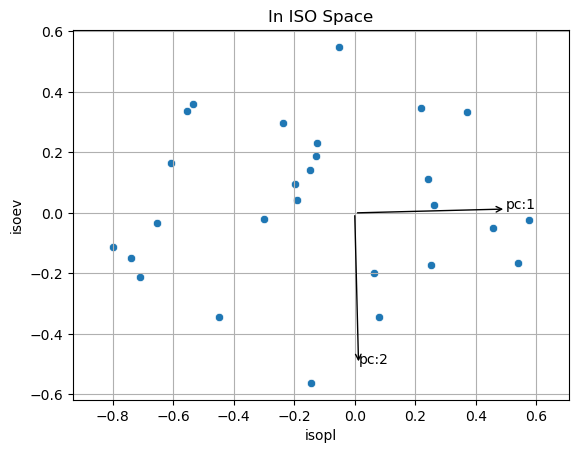

In [26]:
# f, ax = plt.subplots(figsize=(6,6))

pcs = pca.components_
iso_pcs = list(map(l2normalize, [iso_np(pcs[0, :]), iso_np(pcs[1, :])]))


pl = iso_pcs[0]
mo = iso_pcs[1]

ev = cos45 * (-mo -pl)

pc_dict = {
    'jupl': pl,
    'mo': mo,
    'an': -pl,
    'ch': -mo,
    # 'vi': cos45 * (pl - mo),
    'ev': ev,
    # 'un': -ev,
    # 'ca': cos45 * (pl - ev),
}


pc_dict = {k: l2normalize(v) for k, v in pc_dict.items()}

ax = sns.scatterplot(dfx, x=f'isopl', y=f'isoev')

k = 0.5

for i, v in enumerate(iso_pcs):
    print(v)
    ax.annotate("", xy=k*v, xytext=(0, 0),
            arrowprops=dict(arrowstyle="->"))
    
    ax.annotate(f"pc:{i+1}", xy=k*v)



lim = 1.

ax.set(title='In ISO Space', xlim=[-lim, lim], ylim=[-lim, lim])
ax.axis('equal')
ax.grid()

/home/kwatchar3/anaconda3/envs/satp/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/kwatchar3/anaconda3/envs/satp/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/kwatchar3/anaconda3/envs/satp/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/kwatchar3/anaconda3/envs/satp/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/kwatchar3/anaconda3/envs/satp/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/kwatchar3/anaconda3/envs/satp/lib/python3.8/

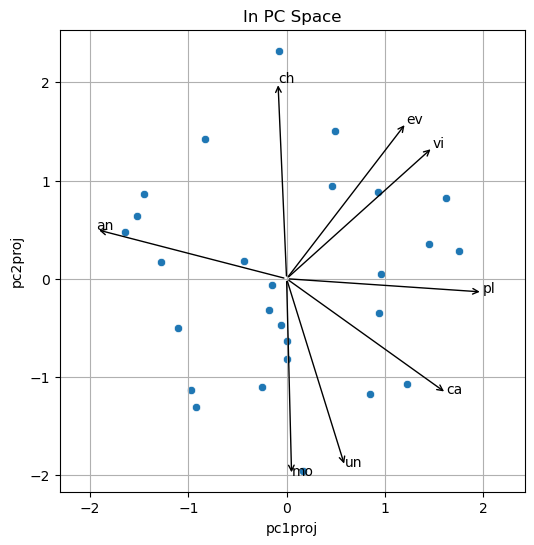

In [27]:
f, ax = plt.subplots(figsize=(6,6))

ax = sns.scatterplot(dfx, x=f'pc1proj', y=f'pc2proj')


directions = {}
for i, p in enumerate(PAQ_ORDER):
    directions[p] = l2normalize(pca.transform(pc_vec(i)[None, :])[0, [0, 1]])
    directions[p][1] *= -1
    
k = 2#0.5

for paq, d in directions.items():
    ax.annotate("", xy=k*d, xytext=(0, 0),
            arrowprops=dict(arrowstyle="->"))
    ax.annotate(paq, xy=k*d)

ax.axis('equal')
ax.set(title='In PC Space')
ax.grid()

In [28]:
def dir2ang(v):
    return (180.0 / np.pi) * np.arctan2(v[1], v[0])


angles = {k: dir2ang(v) for k, v in directions.items()}

angles

{'pl': -3.8676385039979375,
 'ch': 92.50460954962388,
 'vi': 41.96000355550938,
 'un': -72.72001674186673,
 'ca': -35.59177852819399,
 'an': 165.49295491808022,
 'ev': 52.48088306724531,
 'mo': -88.53570219835805}

In [32]:
from scipy.spatial.distance import cosine

In [38]:
adj = {
    'ca': ('pl', 'un'),
    'ch': ('an', 'ev'),
    'vi': ('pl', 'ev'),
    'mo': ('un', 'an')
}

ort = {
    'an': ('un', 'ev'),
    'pl': ('un', 'ev'),
    'un': ('pl', 'an'),
    'ev': ('pl', 'an')
}

In [34]:
directions

{'pl': array([ 0.99772254, -0.06745177]),
 'ch': array([-0.04369976,  0.99904471]),
 'vi': array([0.74361174, 0.66861168]),
 'un': array([ 0.2970413 , -0.95486463]),
 'ca': array([ 0.81318428, -0.58200629]),
 'an': array([-0.96811685,  0.25049905]),
 'ev': array([0.6090261 , 0.79315018]),
 'mo': array([ 0.02555404, -0.99967344])}

In [43]:
def csim(u, v):
    return np.dot(u, v)/np.linalg.norm(u)/np.linalg.norm(v)

In [51]:
def angular_bias(p, q, r):
    
    pq = csim(directions[p], directions[q])
    pr = csim(directions[p], directions[r])
    
    # print(f"{p}-{q}: {pq}")
    # print(f"{p}-{r}: {pr}")
    
    # dist in [-1, 1]
    # diff of dist in [-2, 2] -- (abs) --> [0, 2]
    
    
    return 1 - (np.abs(pq - pr)/2)

for p, (q, r) in adj.items():
    print(p, "ibal:", angular_bias(p, q, r))

    
for p, (q, r) in ort.items():
    print(p, "orth:", angular_bias(p, q, r))

ca ibal: 0.9733484501791915
ch ibal: 0.7633940132568542
vi ibal: 0.8568153595682363
mo ibal: 0.38135002351590375
an orth: 0.9320808482032837
pl orth: 0.9033162175974303
un orth: 0.5562322590205498
ev orth: 0.5274676284146964


In [53]:
def antip(a, b):
    sim = csim(directions[a], directions[b])
    
    # ideal value = -1.0
    # sim in [-1, 1]
    # diff in [0, 2]
    
    return 1.0 - np.abs(sim - (-1.0))/2

antip('pl', 'an'), antip('un', 'ev')

(0.9914042998123469, 0.7882225745291684)